In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dt= pd.read_csv('./laptop_data.csv', index_col=0)
dt.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [4]:
dt.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: >

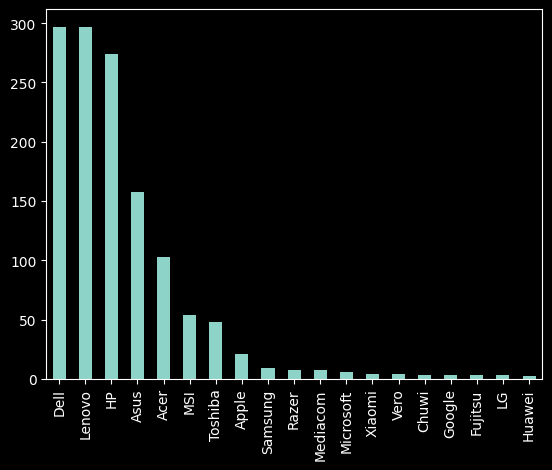

In [5]:
dt['Company'].value_counts().plot(kind='bar')

<Axes: >

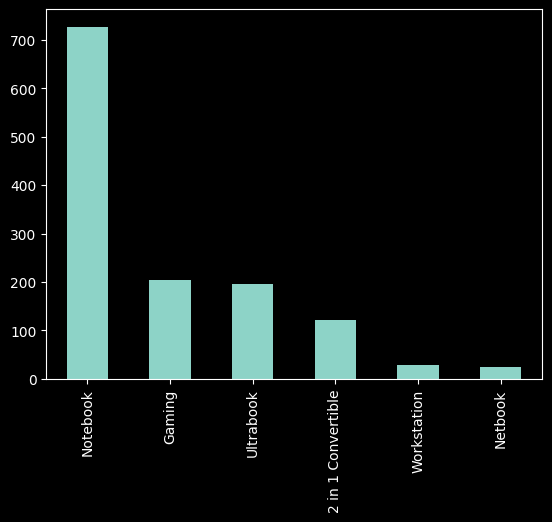

In [6]:
dt['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='Inches', ylabel='Price'>

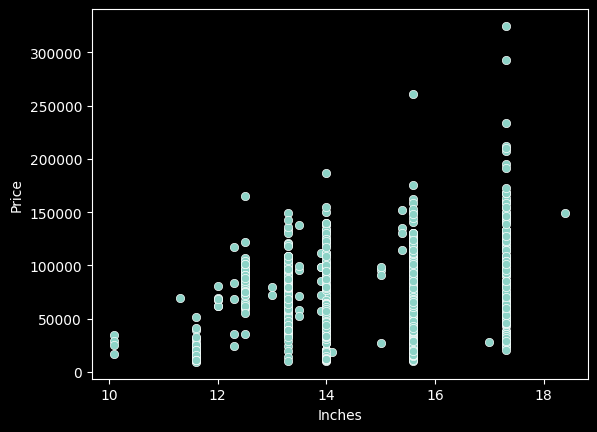

In [7]:
sns.scatterplot(x=dt['Inches'],y= dt['Price'])

In [8]:
dt['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [9]:
dt['Touchscreen'] = dt['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [10]:
dt['Touchscreen'].unique()

array([0, 1])

<Axes: >

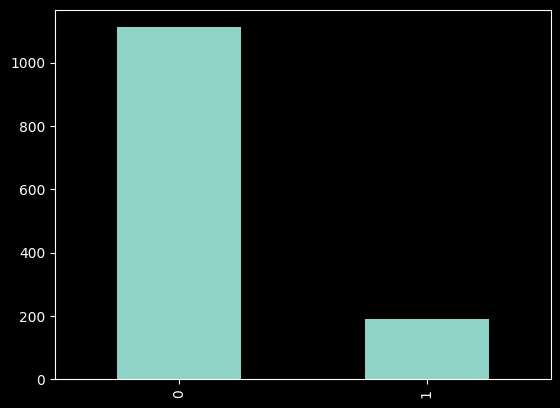

In [11]:
dt['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

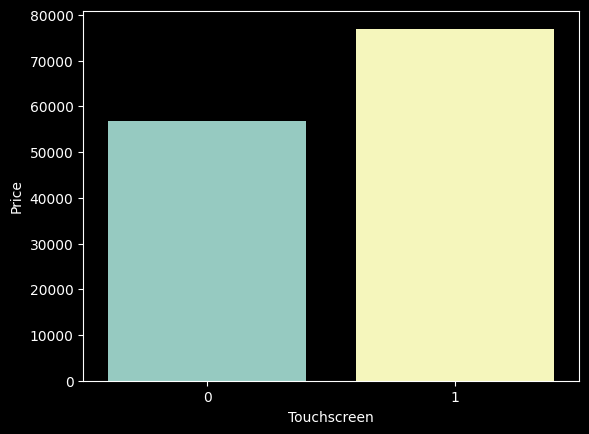

In [12]:
a = dt[['Touchscreen', 'Price']].groupby("Touchscreen").mean().reset_index()
sns.barplot(x=a['Touchscreen'], y=a['Price'])

In [13]:
dt['IPS'] = dt['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [14]:
dt['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

<Axes: xlabel='IPS', ylabel='Price'>

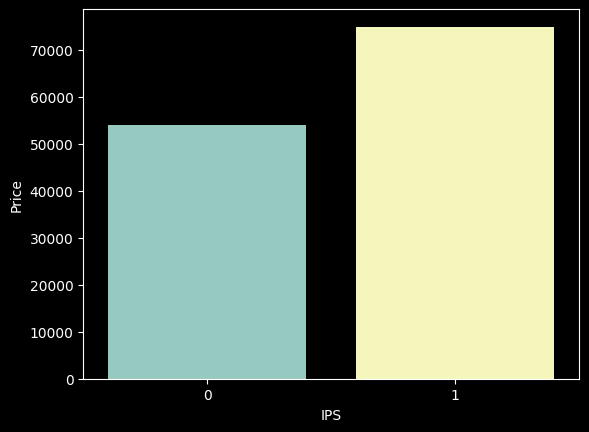

In [15]:
b = dt[['IPS', 'Price']].groupby("IPS").mean().reset_index()
sns.barplot(x=b['IPS'], y=b['Price'])

In [16]:
dt['resolution'] = dt['ScreenResolution'].str.split(' ').str[-1]

In [17]:
dt.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,resolution
122,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,No OS,2.2kg,33513.12,0,0,1920x1080
1113,HP,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.16kg,104908.32,0,0,1920x1080
343,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,111834.72,1,1,3840x2160
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.5kg,17316.00,0,0,1366x768
188,Acer,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.12kg,52693.92,0,1,1920x1080


In [18]:
h = dt['resolution'].str.split('x').str[0].astype('float')**2

In [19]:
print(h)

0        6553600.0
1        2073600.0
2        3686400.0
3        8294400.0
4        6553600.0
           ...    
1298     3686400.0
1299    10240000.0
1300     1865956.0
1301     1865956.0
1302     1865956.0
Name: resolution, Length: 1303, dtype: float64


In [20]:
w =  dt['resolution'].str.split('x').str[-1].astype('float')**2
print(w)

0       2560000.0
1        810000.0
2       1166400.0
3       3240000.0
4       2560000.0
          ...    
1298    1166400.0
1299    3240000.0
1300     589824.0
1301     589824.0
1302     589824.0
Name: resolution, Length: 1303, dtype: float64


In [21]:
dt['ppi'] = ((h+w)**0.5)/dt['Inches']

In [22]:
dt

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,resolution,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560x1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440x900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920x1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880x1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560x1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1920x1080,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,3200x1800,276.053530
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,1366x768,111.935204
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,1366x768,100.454670


In [23]:
dt['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [24]:
dt['cpu_name'] = dt['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [25]:
dt

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,resolution,ppi,cpu_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560x1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440x900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920x1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880x1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560x1600,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1920x1080,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,3200x1800,276.053530,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,1366x768,111.935204,Intel Celeron Dual
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,1366x768,100.454670,Intel Core i7


In [26]:
dt['cpu_name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [27]:
def processor(type):
    if type == "Intel Core i7" or type == 'Intel Core i5' or type == 'Intel Core i3':
        return type
    elif type.split()[0] == 'Intel':
        return 'other intel processors'
    else:
        return 'amd processors'
    
dt['CPU Types'] = dt['cpu_name'].apply(processor)


In [28]:
dt

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,resolution,ppi,cpu_name,CPU Types
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440x900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920x1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880x1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1920x1080,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,3200x1800,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,1366x768,111.935204,Intel Celeron Dual,other intel processors
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,1366x768,100.454670,Intel Core i7,Intel Core i7


<Axes: >

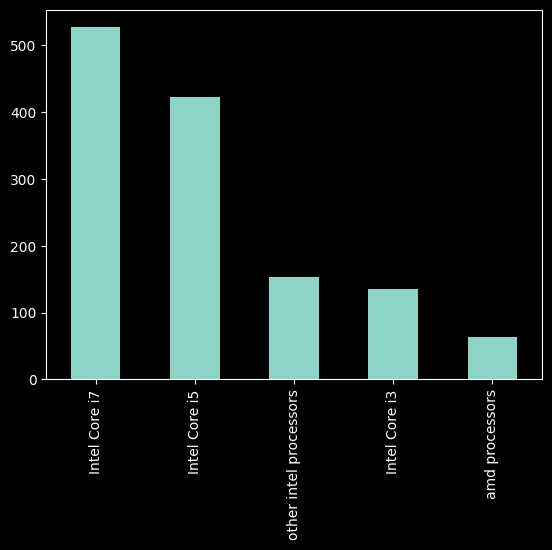

In [29]:
dt['CPU Types'].value_counts().plot(kind='bar')

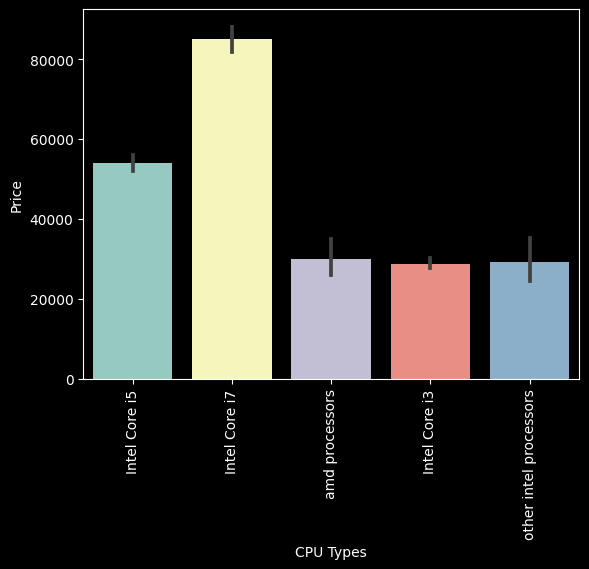

In [30]:
sns.barplot(x=dt['CPU Types'],y=dt['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [31]:
dt

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,resolution,ppi,cpu_name,CPU Types
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440x900,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920x1080,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880x1800,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1,1,1920x1080,157.350512,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1,1,3200x1800,276.053530,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0,0,1366x768,111.935204,Intel Celeron Dual,other intel processors
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0,0,1366x768,100.454670,Intel Core i7,Intel Core i7


<Axes: >

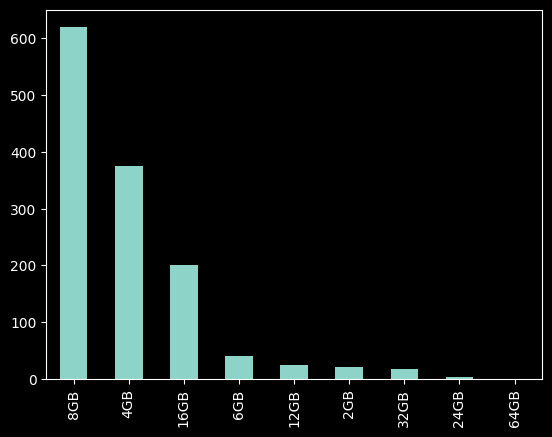

In [32]:
dt['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

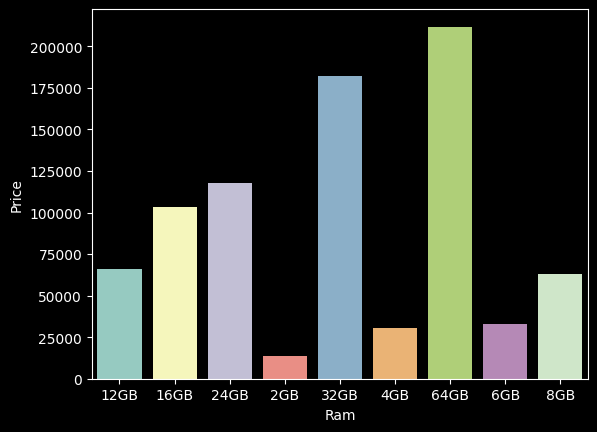

In [33]:
c = dt[['Ram', 'Price']].groupby("Ram").mean().reset_index()
sns.barplot(x=c['Ram'],y=c['Price'])

In [34]:
dt['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [35]:
abc = dt['Memory'].str.replace('\.0', '', regex=True)
abc = abc.str.replace('GB', '')
abc = abc.str.replace('TB', '000')
new = abc.str.split("+", expand = True)
new[0] = new[0].str.strip()
new[1] = new[1].str.strip()

In [36]:
new[1].fillna("0", inplace = True)

In [37]:
new[0].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [38]:
dt['Memory'] = dt['Memory'].astype(str).replace('\.0', '', regex=True)
dt["Memory"] = dt["Memory"].str.replace('GB', '')
dt["Memory"] = dt["Memory"].str.replace('TB', '000')
new = dt["Memory"].str.split("+", n = 1, expand = True)
new[0] = new[0].str.strip()
new[1] = new[1].str.strip()
new[1].fillna("0", inplace = True)

dt["HDD"] = new[0].apply(lambda x: int(x.split()[0]) if "HDD" in x else 0) + new[1].apply(lambda x: int(x.split()[0]) if "HDD" in x else 0)
dt["SSD"] = new[0].apply(lambda x: int(x.split()[0]) if "SSD" in x else 0) + new[1].apply(lambda x: int(x.split()[0]) if "SSD" in x else 0)
dt["Hybrid"] = new[0].apply(lambda x: int(x.split()[0]) if "Hybrid" in x else 0) + new[1].apply(lambda x: int(x.split()[0]) if "Hybrid" in x else 0)
dt["Flash_Storage"] = new[0].apply(lambda x: int(x.split()[0]) if "Flash Storage" in x else 0) + new[1].apply(lambda x: int(x.split()[0]) if "Flash Storage" in x else 0)

# dt["second"].fillna("0", inplace = True)

# dt["Layer2HDD"] = dt["second"].apply(lambda x: 1 if "HDD" in x else 0)
# dt["Layer2SSD"] = dt["second"].apply(lambda x: 1 if "SSD" in x else 0)
# dt["Layer2Hybrid"] = dt["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
# dt["Layer2Flash_Storage"] = dt["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# dt['second'] = dt['second'].str.replace(r'\D+', '', regex=True)

# dt["HDD"]=(dt["first"]*dt["Layer1HDD"]+dt["second"]*dt["Layer2HDD"])
# dt["SSD"]=(dt["first"]*dt["Layer1SSD"]+dt["second"]*dt["Layer2SSD"])
# dt["Hybrid"]=(dt["first"]*dt["Layer1Hybrid"]+dt["second"]*dt["Layer2Hybrid"])
# dt["Flash_Storage"]=(dt["first"]*dt["Layer1Flash_Storage"]+dt["second"]*dt["Layer2Flash_Storage"])

# dt.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
#        'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
#        'Layer2Flash_Storage'],inplace=True)

In [39]:
dt['HDD'].value_counts()

0       727
1000    408
500     134
2000     32
32        1
128       1
Name: HDD, dtype: int64

In [40]:
dt['SSD'].value_counts()

256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: SSD, dtype: int64

In [41]:
dt['Hybrid'].value_counts()

0       1291
1000      11
508        1
Name: Hybrid, dtype: int64

In [42]:
dt['Flash_Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash_Storage, dtype: int64

In [43]:
dt

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Touchscreen,IPS,resolution,ppi,cpu_name,CPU Types,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0,0,1440x900,127.677940,Intel Core i5,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,...,0,0,1920x1080,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0,1,2880x1800,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0,1,2560x1600,226.983005,Intel Core i5,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128 SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,1,1,1920x1080,157.350512,Intel Core i7,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512 SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,1,1,3200x1800,276.053530,Intel Core i7,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64 Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,0,0,1366x768,111.935204,Intel Celeron Dual,other intel processors,0,0,0,64
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,0,0,1366x768,100.454670,Intel Core i7,Intel Core i7,1000,0,0,0


In [44]:
dt['GPU Brand'] = dt['Gpu'].str.split().str[0]

In [45]:
dt.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'resolution', 'ppi', 'cpu_name', 'CPU Types', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage', 'GPU Brand'],
      dtype='object')

<Axes: >

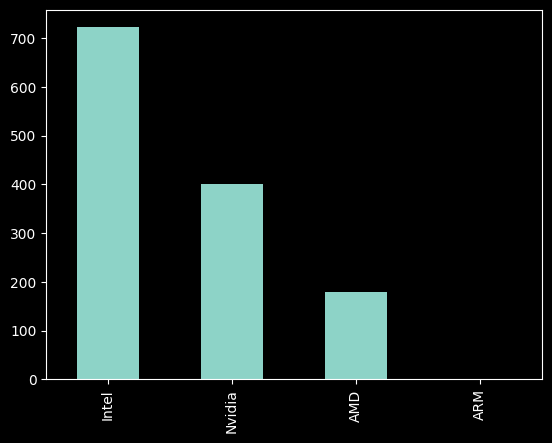

In [46]:
dt['GPU Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='GPU Brand', ylabel='Price'>

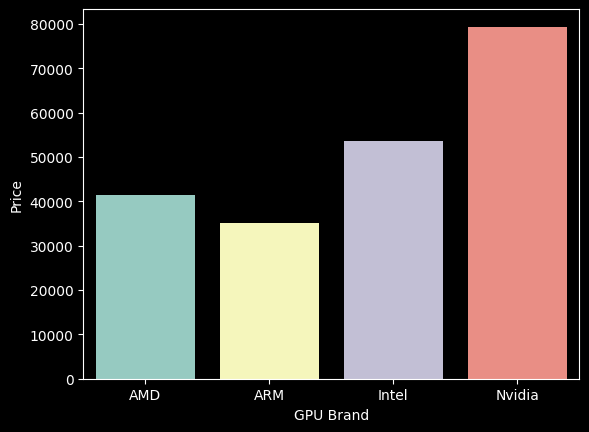

In [47]:
b = dt[['GPU Brand', 'Price']].groupby("GPU Brand").mean().reset_index()
sns.barplot(x=b['GPU Brand'],y=b['Price'])

In [48]:
# dt.drop(columns=['Gpu'],axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Android'),
  Text(1, 0, 'Chrome OS'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'No OS'),
  Text(5, 0, 'Windows 10'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Windows 7'),
  Text(8, 0, 'macOS')])

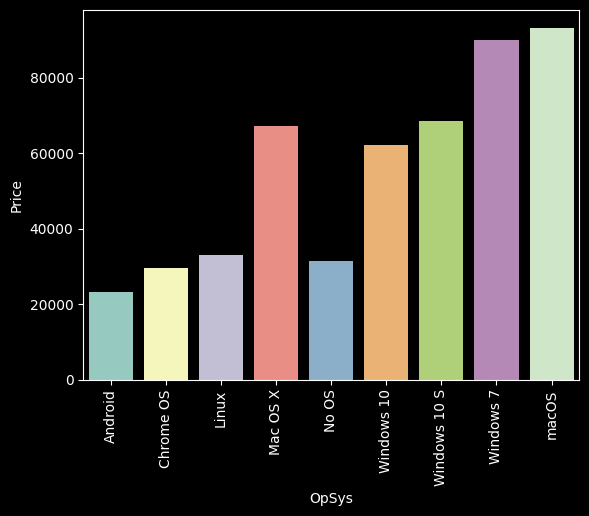

In [49]:
b = dt[['OpSys', 'Price']].groupby("OpSys").mean().reset_index()
sns.barplot(x=b['OpSys'],y=b['Price'])
plt.xticks(rotation='vertical')

In [50]:
dt['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [51]:
def sys(text):
    if text == 'Windows 10' or text == 'Windows 10 S' or text == 'Windows 7':
        return 'window'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'other sys'

In [52]:
dt['Sys_name'] = dt['OpSys'].apply(sys)

<Axes: >

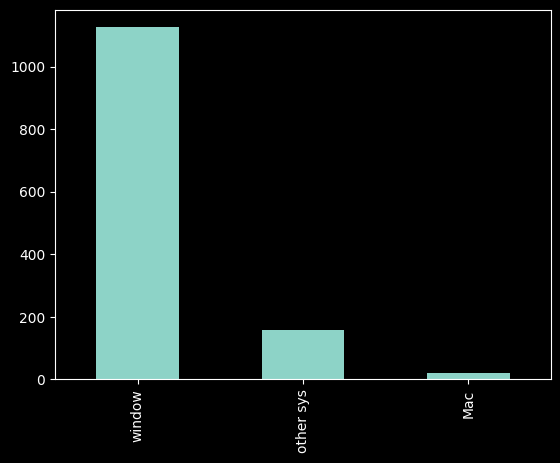

In [53]:
dt['Sys_name'].value_counts().plot(kind='bar')

<Axes: xlabel='Sys_name', ylabel='Price'>

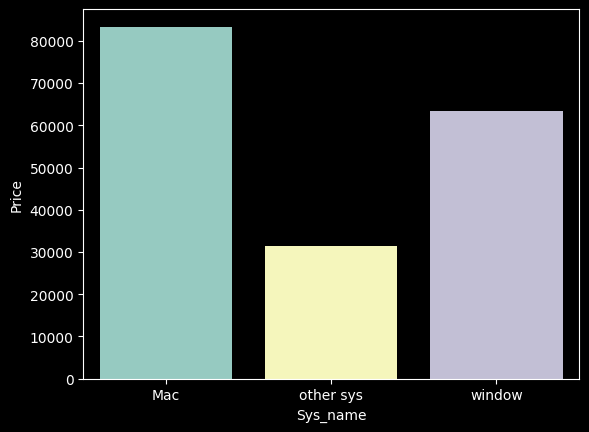

In [54]:
b = dt[['Sys_name', 'Price']].groupby("Sys_name").mean().reset_index()
sns.barplot(x= b['Sys_name'], y= b['Price'])

In [55]:
dt['Weight'] = dt['Weight'].str.replace('kg','').astype(float)

In [56]:
dt['Weight'].mean()

2.0387336914811973

<Axes: xlabel='Weight', ylabel='Count'>

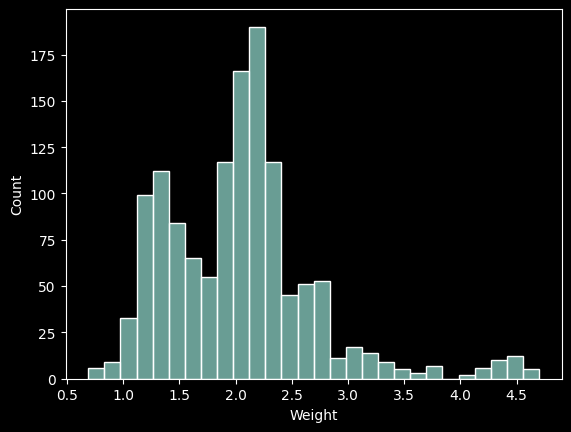

In [57]:
sns.histplot(dt['Weight'])

In [58]:
dt = dt.drop(columns=["Memory", "Cpu","Gpu", "ScreenResolution", "Inches", "resolution", "OpSys", "cpu_name"])

In [66]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   object 
 3   Weight         1303 non-null   float64
 4   Price          1303 non-null   float64
 5   Touchscreen    1303 non-null   int64  
 6   IPS            1303 non-null   int64  
 7   ppi            1303 non-null   float64
 8   CPU Types      1303 non-null   object 
 9   HDD            1303 non-null   int64  
 10  SSD            1303 non-null   int64  
 11  Hybrid         1303 non-null   int64  
 12  Flash_Storage  1303 non-null   int64  
 13  GPU Brand      1303 non-null   object 
 14  Sys_name       1303 non-null   object 
dtypes: float64(3), int64(6), object(6)
memory usage: 195.2+ KB


In [67]:
a = pd.get_dummies(dt)
X = a.drop(columns=['Price'])
y = np.log(dt['Price'])

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Weight                            1303 non-null   float64
 1   Touchscreen                       1303 non-null   int64  
 2   IPS                               1303 non-null   int64  
 3   ppi                               1303 non-null   float64
 4   HDD                               1303 non-null   int64  
 5   SSD                               1303 non-null   int64  
 6   Hybrid                            1303 non-null   int64  
 7   Flash_Storage                     1303 non-null   int64  
 8   Company_Acer                      1303 non-null   uint8  
 9   Company_Apple                     1303 non-null   uint8  
 10  Company_Asus                      1303 non-null   uint8  
 11  Company_Chuwi                     1303 non-null   uint8  
 12  Compan

In [69]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [73]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor, KDTree

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
kmean = KMeans(n_clusters=5)

kmean.fit(X_train, y_train)

y_pred = kmean.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

/home/ledinhnguyen/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


R2 score -209.71997869232865
MAE 8.543841788366777


In [74]:
knn = KNeighborsRegressor(n_neighbors=20)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.7056644393177349
MAE 0.25351984071067935
